In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as pl

from sklearn import preprocessing as prep
from scipy import stats
from sklearn import preprocessing as prep

# Reading and Combining Datasets

In [56]:
df_mat = pd.read_csv("student-mat.csv", sep = ';')

In [57]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [58]:
df_por = pd.read_csv("student-por.csv", sep = ";")

In [59]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [60]:
all_data = pd.concat([df_mat, df_por])
all_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Check For Missing Values

In [61]:
#checking for missing values
all_data.isnull().sum()
#no initial missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Check For Outliers

In [62]:
all_data.dtypes
#can only check outliers for numeric variables

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

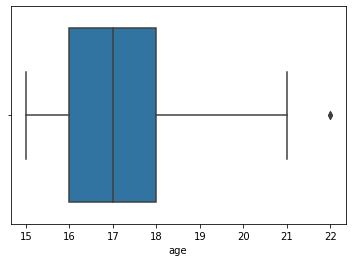

In [63]:
#age column
sns.boxplot(x = all_data['age'])
#one outlier but not significant enough to impact the data

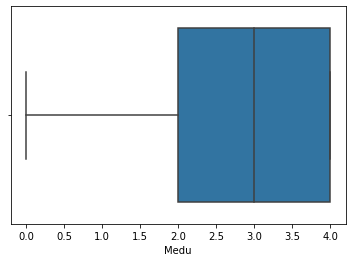

In [64]:
#Medu column
sns.boxplot(x = all_data['Medu'])
#no outliers

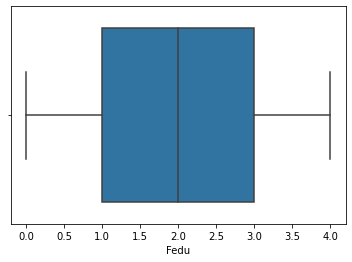

In [65]:
#Fedu column
sns.boxplot(x = all_data['Fedu'])
#no outlier

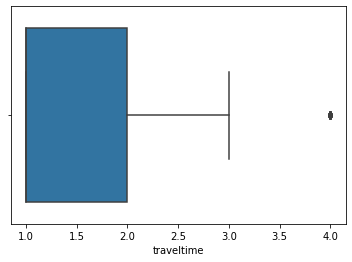

In [66]:
#traveltime column
sns.boxplot(x = all_data['traveltime'])
#one outlier but not significant enough to impact the data

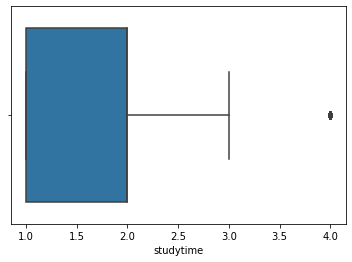

In [67]:
#studytime
sns.boxplot(x = all_data['studytime'])
#one outlier but not significant enough to impact the data

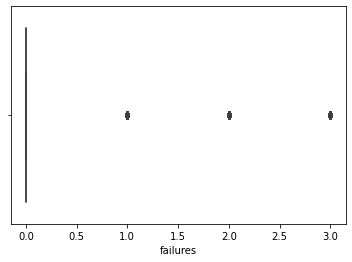

In [68]:
#failures column
sns.boxplot(x = all_data['failures'])
#no need to remove outliers because they are classifiers for the number of past class failures. the categories range from 1-4

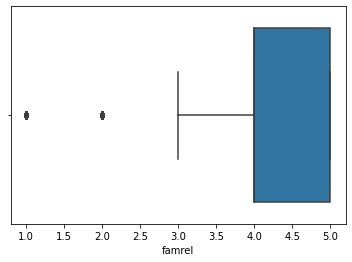

In [69]:
#famrel column
sns.boxplot(x = all_data['famrel'])
#two outliers but no need for removel because famrel classifies the quality of family relationships
#ranges from 1-5

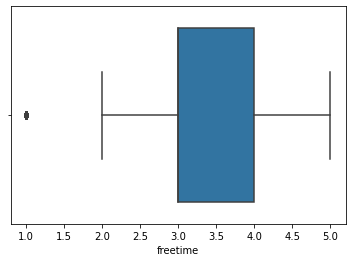

In [70]:
#freetime column
sns.boxplot(x = all_data['freetime'])
#one outlier but no need for removal because it is a categorical value that has a scale from 1 to 5

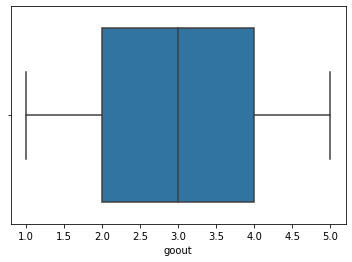

In [71]:
#goout column
sns.boxplot(x = all_data['goout'])
#no outliers

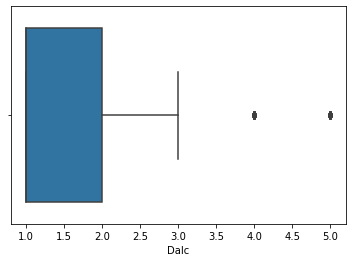

In [72]:
#Dalc column
sns.boxplot(x = all_data['Dalc'])
#two outliers but no need for removal because they are numeric categorial values that has a scale from 1 to 5

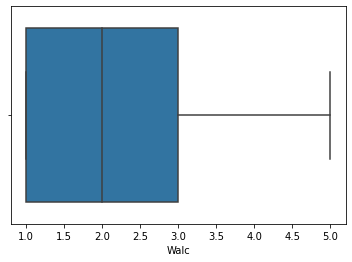

In [73]:
#Walc column
sns.boxplot(x = all_data['Walc'])
#no outliers

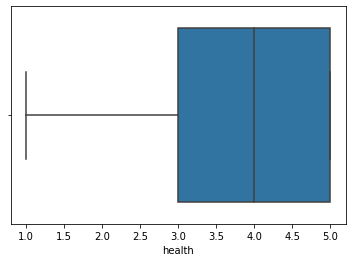

In [74]:
#health column
sns.boxplot(x = all_data['health'])
#no outliers

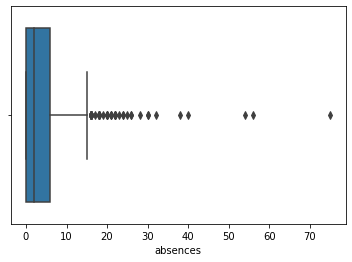

In [75]:
#absences column
sns.boxplot(x = all_data['absences'])
#outliers but not significant enough to impact the data

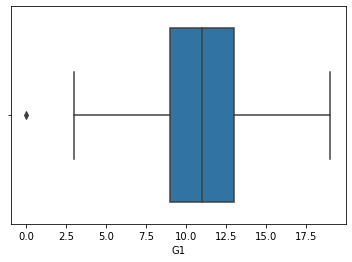

In [76]:
#G1 column
sns.boxplot(x = all_data['G1'])
#one outlier but not significant enough to impact the data

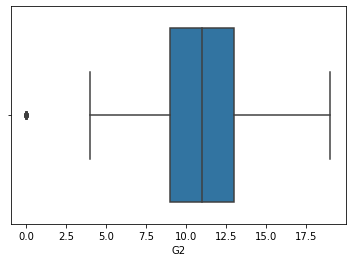

In [77]:
#G2 column
sns.boxplot(x = all_data['G2'])
#one outlier but not significant enough to impact the data

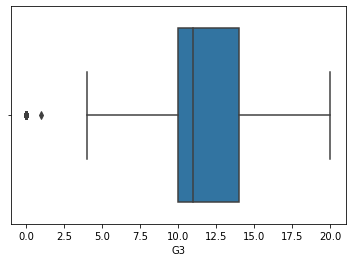

In [78]:
#G3 column
sns.boxplot(x = all_data['G3'])
#outliers but not significant enough to impact the data

# Determining and Removing Predictors

In [79]:
all_data.std()

age           1.239975
Medu          1.124907
Fedu          1.099938
traveltime    0.731727
studytime     0.834353
failures      0.656142
famrel        0.933401
freetime      1.031507
goout         1.152575
Dalc          0.911714
Walc          1.285105
health        1.424703
absences      6.210017
G1            2.983394
G2            3.285071
G3            3.864796
dtype: float64

In [80]:
#checking correlations
c = all_data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
for idx, row in pd.DataFrame(so).iterrows():
    if row[0] < 1:
        print(row)

0    0.910743
Name: (G2, G3), dtype: float64
0    0.910743
Name: (G3, G2), dtype: float64
0    0.858739
Name: (G2, G1), dtype: float64
0    0.858739
Name: (G1, G2), dtype: float64
0    0.809142
Name: (G3, G1), dtype: float64
0    0.809142
Name: (G1, G3), dtype: float64
0    0.642063
Name: (Fedu, Medu), dtype: float64
0    0.642063
Name: (Medu, Fedu), dtype: float64
0    0.627814
Name: (Walc, Dalc), dtype: float64
0    0.627814
Name: (Dalc, Walc), dtype: float64
0    0.399794
Name: (Walc, goout), dtype: float64
0    0.399794
Name: (goout, Walc), dtype: float64
0    0.383145
Name: (failures, G3), dtype: float64
0    0.383145
Name: (G3, failures), dtype: float64
0    0.377172
Name: (G2, failures), dtype: float64
0    0.377172
Name: (failures, G2), dtype: float64
0    0.374175
Name: (G1, failures), dtype: float64
0    0.374175
Name: (failures, G1), dtype: float64
0    0.323556
Name: (freetime, goout), dtype: float64
0    0.323556
Name: (goout, freetime), dtype: float64
0    0.282364
Name: 

In [81]:
#deleting predictors
del all_data['G1']
del all_data['G2']
del all_data['Fedu']
del all_data['Walc']

#G1 and G2 will be deleted because they are highly correlated with G3. G3 was kept because it is the calculation of the
#final grade, while G1 and G2 are just the first and second period, respectively

#Fedu and Walc were deleted because they are moderately highly coreelated with columns such as Medu and Dalc

In [82]:
#checking if deleted properly
all_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health',
       'absences', 'G3'],
      dtype='object')

# Copy Data

In [83]:
df_univariate = all_data.copy()
df_univariate.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G3
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,3,6,6
1,GP,F,17,U,GT3,T,1,at_home,other,course,...,yes,yes,no,5,3,3,1,3,4,6
2,GP,F,15,U,LE3,T,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,10,10
3,GP,F,15,U,GT3,T,4,health,services,home,...,yes,yes,yes,3,2,2,1,5,2,15
4,GP,F,16,U,GT3,T,3,other,other,home,...,yes,no,no,4,3,2,1,5,4,10


In [84]:
df_backward_elim = all_data.copy()
df_backward_elim.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G3
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,3,6,6
1,GP,F,17,U,GT3,T,1,at_home,other,course,...,yes,yes,no,5,3,3,1,3,4,6
2,GP,F,15,U,LE3,T,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,10,10
3,GP,F,15,U,GT3,T,4,health,services,home,...,yes,yes,yes,3,2,2,1,5,2,15
4,GP,F,16,U,GT3,T,3,other,other,home,...,yes,no,no,4,3,2,1,5,4,10


# Model 1 Task: Univariate Feature Selection

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_univariate[["age", "failures", "Medu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "health", "G3"]]
y = df_univariate['absences']
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

#The three highest performing features are "failures", "G3", "Dalc"
#No need to convert any discrete variables into dummies because they are all continuous

[ 8.172 69.135 15.589  9.203 11.948  9.138 13.086 15.548 42.367 22.153
 51.343]


In [90]:
X = df_univariate[['failures', 'G3', 'Dalc']]
y = df_univariate['absences']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [93]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [95]:
regression_model.score(X_test, y_test)
#R^2 Score

0.03169420752365815

In [98]:
from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse
#RMSE Score

27.49105290843148

### A good linear regression model will have a low RSME score and a high R^2 score. For this model, the RSME score is 27.491 and the R*2 score is  0.03169. This model has a high RSME score which means that there is a large difference between values predicted by the model and the values observed. A high RSME score means a less accurate model. This mode has a low R^2 score which means that less than 3% of the observed variation can be explained by the model's inputs. This is not a good linear regression model

# Model 2 Task: Backward Feature Elimination

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df_backward_elim[["age", "failures", "Medu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "health", "G3"]]
y = df_backward_elim["absences"]
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Columns: " + str(X.columns))
print("Num Features: ",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)

#The three highest performing features are "freetime", "Dalc", and "health"

C:\Users\kzhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\kzhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kzhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

Columns: Index(['age', 'failures', 'Medu', 'traveltime', 'studytime', 'famrel',
       'freetime', 'goout', 'Dalc', 'health', 'G3'],
      dtype='object')
Num Features:  3
Selected Features:  [False False False False False False  True False  True  True False]
Feature Ranking:  [8 5 6 2 3 7 1 4 1 1 9]


C:\Users\kzhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
X = df_backward_elim[['freetime', 'Dalc', 'health']]
y = df_backward_elim['absences']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [104]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [105]:
regression_model.score(X_test, y_test)
#R^2 Score

-0.03276784629038665

In [107]:
from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse
#RSME Score

29.32118729960973

### The regression model created with the backward feature selection was not a good one either. For this model, the R^2 score was -0.03276 and the RSME score is 29.321. The R^2 score went into the negatives which means that the model did not follow the trend of the data and failed in improving the prediction over the mean model. Similarly to the univariate model, the RSME score is very high which means that the standard deviation is high which results in a lot of spread. This is not a good linear regression model

# Comparison


### Both models were not good linear regression models and did not do a good job at predicting absences. When comparing the scores of the two models, the univariate model is slightly better than the backward feature selection model. The R^2 score for the univariate model was 0.03169 and the R^2 score for the backward feature selection model was -0.03276. The univariate model has a better R^2 score because it is in the positives and show there there is a relationship between the predictors and the response even though the relationship is so small. The RSME score for the univariate model is 27.491 and the RSME score for the backward feature selection model is 29.321. A linear regression model prefers a lower RSME score and the univariate model has the lower score between the two. As a result, the univariate model is preferred because both the R^2 score and the RSME are better.